In [92]:
%reload_ext autoreload
%autoreload 2
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [52]:
G = nx.read_graphml('data/2016-12-11.wot.mut.graphml')
mapper = {}
for i, nd in enumerate(G.nodes()):
    mapper[nd] = i
G = nx.relabel_nodes(G, mapper)

remebunch = []
for nd in G.nodes():
    if nd in G.neighbors(nd):
        remebunch.append((nd,nd))
        print("%d has edge to itself!" % nd)
G.remove_edges_from(remebunch)

In [3]:
G.number_of_nodes()

48983

In [4]:
G.number_of_edges()

183840

In [5]:
for node_num in range(0,48983):
    try:
        del G.node[node_num]['label']
    except Exception as ex:
        print(node_num)

In [6]:
for e in G.edges():
    del G.edge[e[0]][e[1]]["cert_level"]
    del G.edge[e[0]][e[1]]["primary_id"]

In [9]:
G.neighbors(0)

[6273, 1010, 43395, 9348, 30385, 15977, 38236, 10540, 35705]

In [10]:
G.edge[0][1010]

{}

In [11]:
#nx.write_graphml(G, "data/2016-12-11.wot.plain.graphml")

## Create clipped degree subgraphs

In [96]:
from utils.misc import remove_hubs
G = nx.read_graphml('data/wot_default.graphml')
G = remove_hubs(G)
id_to_deg = nx.degree(G)
sorted(id_to_deg.items(), key=lambda x: x[1])
#nx.write_graphml(G, "data/wot_max100deg.graphml")

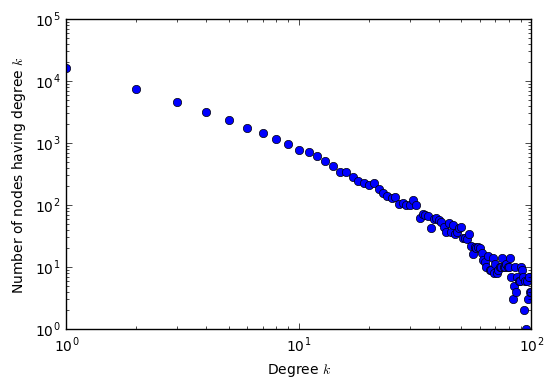

In [99]:
degree_sequence=sorted(nx.degree(G).values())
hist={} # {degree k: number of v with deg k}
for d in degree_sequence:
    if d in hist:
        hist[d]+=1
    else:
        hist[d]=1
# degree dist
plt.loglog(list(hist.keys()), list(hist.values()),'bo')
#plt.title("Degree distribution")
plt.ylabel("Number of nodes having degree $k$")
plt.xlabel("Degree $k$")
#plt.savefig('fig/wot_degree_distribution.eps')
plt.show()